In [15]:
from src.models.jelly import BaseJellyNet, SpikingMNET10
import torch
from torchvision.datasets import MNIST
import numpy as np
from torchvision.transforms import Compose, ToTensor
from PIL import Image
import matplotlib.pyplot as plt

model = SpikingMNET10((1, 224, 224), 4, 5, encoding_method='poisson')

N = 10
img = Image.open('./figures/abnormal_image.png')
transform = Compose([
    ToTensor(),
])
x = transform(img)
x = x.unsqueeze(0).repeat(N, 1, 1, 1, 1)
x_encoded = model.encoder(x)
x = model.net[0](x_encoded)
print('Shape : {}'.format(x.shape))

Shape : torch.Size([10, 1, 16, 127, 127])


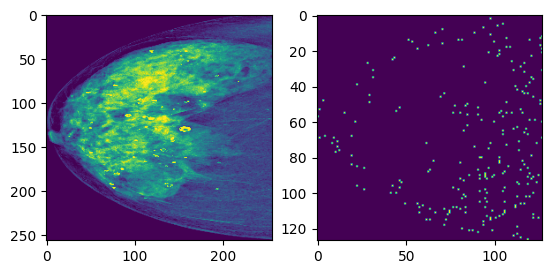

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img)
ax2.imshow(x[0][0][5].detach().cpu().numpy())

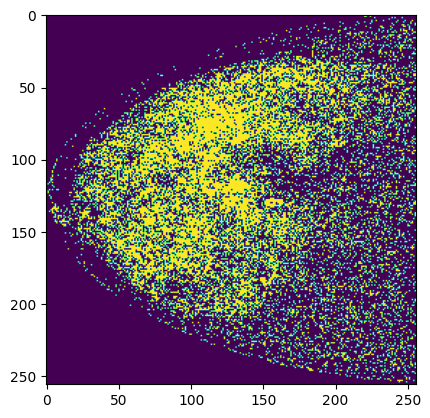

In [21]:
plt.imshow(x_encoded[0][0][0])